## Day 13. Task 05
## Регрессия
### 0. Импорты

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

### 1. Препроцессинг
 
1. Прочитайте файл из: datasets/checker_regression.csv.

In [46]:
df = pd.read_csv('checker_regression.csv')

2. Заполните пропущенные значения нулями.

In [47]:
df.fillna(0, inplace=True); df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [48]:
df = pd.get_dummies(df); df

,num_commits,pageviews,AVG(diff),uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8
0,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,128,0.0,-104.75,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
73,40,0.0,-175.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
74,15,0.0,-62.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
75,8,0.0,-115.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
scaler = StandardScaler()
df[['num_commits', 'pageviews']] = scaler.fit_transform(df[['num_commits', 'pageviews']]); df

,num_commits,pageviews,AVG(diff),uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8
0,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2.585669,-0.775718,-104.75,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
73,-0.319404,-0.775718,-175.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
74,-1.144708,-0.775718,-62.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
75,-1.375794,-0.775718,-115.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


3. Разбейте ваш датасет на train и test, используя параметр test_size=0.2.

In [50]:
X = df.drop(columns='AVG(diff)')
y = df['AVG(diff)']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=21,
                                                    shuffle=True,
                                                    stratify=None)

### 2. Кросс-валидация
 
1. Напишите функцию 'crossval', которая на вход примет: 'n_splits' для 'KFold()', 'X', 'y', созданный класс модели с ее параметрами (не забывайте про 'random_state=21'). И вернет в качестве результата что-то такое:

'''
train -  2696.4496895424836   |   test -  1589.9979527104958

train -  2660.957874001452   |   test -  2075.102636027137

train -  2847.315529246795   |   test -  320.911928168403

train -  2500.7691099659237   |   test -  4132.461382030178

train -  2643.927917295123   |   test -  2237.8140952197878

train -  2396.295678819444   |   test -  4509.650064742476

train -  2003.402267924976   |   test -  8403.491474908551

train -  2531.876094212613   |   test -  3135.944102735099

train -  2683.1795186023123   |   test -  1796.01426292594

train -  2537.1192483996338   |   test -  3439.29824116941
'''

Средний RMSE на кросс-валидации – 3164.0686140637476

In [52]:
def crossval(n_splits, X, y, model):
    X = np.array(X)
    y = np.array(y)
    kf = KFold(n_splits=n_splits,
                shuffle=True,
                random_state=21)
    result=0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        fit = model.fit(X_train, y_train)
        train_predict = fit.predict(X_train)
        test_predict = fit.predict(X_test)
        rmse_train = mean_squared_error(y_train, train_predict, squared=False)
        rmse_test = mean_squared_error(y_test, test_predict, squared=False)
        print('train -  {}    |    test -  {}'.format(rmse_train, rmse_test))
        result +=rmse_test
    result /= n_splits
    print('Средний RMSE на кросс-валидации -  {}'.format(result))
    return result


2. Запустите эту функцию для LinearRegression, DecisionTreeRegressor, RandomForestRegressor. Вы можете использовать любые гиперпараметры для этих моделей, но постарайтесь найти наилучшие для себя.

*параметры по умолчанию*

In [53]:
lr_cv = crossval(10, X_train, y_train, LinearRegression())

train -  1.0933383217917658e-13    |    test -  29.54155961974626
train -  4.5605408571829746e-14    |    test -  43.521061556002806
train -  2.5443508093890483e-13    |    test -  28.398412899629687
train -  3.6132600212837915e-14    |    test -  63.35602140569198
train -  4.889104826420643e-14    |    test -  25.33377924551226
train -  3.947005883460402e-14    |    test -  8.84139874762949
train -  8.744960125178234e-14    |    test -  40.78088908093916
train -  3.2133953324007347e-13    |    test -  16.62422239008687
train -  5.341665077516091e-14    |    test -  27.779195219064963
train -  6.962126093957673e-14    |    test -  23.08088271228177
Средний RMSE на кросс-валидации -  30.725742287658523


In [54]:
tree_cv = crossval(10, X_train, y_train, DecisionTreeRegressor(random_state=21))

train -  0.0    |    test -  41.651684925616834
train -  0.0    |    test -  49.425259698825016
train -  0.0    |    test -  56.90981169066251
train -  0.0    |    test -  60.36467571414655
train -  0.0    |    test -  19.187669651801563
train -  0.0    |    test -  23.43345187262574
train -  0.0    |    test -  58.142971932858615
train -  0.0    |    test -  68.36564005946803
train -  0.0    |    test -  54.39678341865717
train -  0.0    |    test -  44.97535333276891
Средний RMSE на кросс-валидации -  47.685330229743094


In [55]:
forest_cv = crossval(10, X_train, y_train, RandomForestRegressor(random_state=21))

train -  13.436176003890042    |    test -  18.901121378087797
train -  12.905204026541632    |    test -  28.379788159885926
train -  12.255745067460639    |    test -  43.003037800156214
train -  11.0340619080375    |    test -  58.06881306228812
train -  12.448612850941508    |    test -  30.526017464236165
train -  14.076597681609673    |    test -  6.174074979448449
train -  13.054888824408907    |    test -  29.167927602346754
train -  12.24783608644829    |    test -  54.39843410336499
train -  13.139498320758372    |    test -  33.05316171238667
train -  13.287917098255127    |    test -  23.261715425103944
Средний RMSE на кросс-валидации -  32.4934091687305


*подбор параметров*

*DecisionTreeRegressor*

In [56]:
regressor = DecisionTreeRegressor(random_state=21)

In [57]:
grid = {'max_depth': [5,6,7,8,9,10,20,25,30,50],
        'max_features': ['sqrt', 'log2']}

In [58]:
best_score = 10000
for g in ParameterGrid(grid):
    regressor.set_params(**g)
    score = crossval(10, X_train, y_train, regressor)
    if score < best_score:
        best_score = score
        best_grid_tree = g

train -  38.049220668226795    |    test -  48.16537018743332
train -  28.47584475028659    |    test -  62.14247561585125
train -  34.832235274848856    |    test -  12.60971481305849
train -  26.522062645459858    |    test -  87.78452214940853
train -  34.84827558448367    |    test -  12.129405510454214
train -  31.928848677626757    |    test -  31.48357986316042
train -  23.843429944434412    |    test -  36.64443613974706
train -  35.818169106506446    |    test -  20.18994781171689
train -  32.32869375647584    |    test -  41.28095502143187
train -  31.928848677626757    |    test -  43.89482089039662
Средний RMSE на кросс-валидации -  39.63252280026586
train -  21.701435066617538    |    test -  21.424286211739688
train -  34.07702577051408    |    test -  61.0722076752137
train -  39.28926582119519    |    test -  14.711475023235696
train -  16.569383332373942    |    test -  53.171197682775905
train -  39.245197457725034    |    test -  16.016800951763692
train -  39.142430

In [59]:
best_score

31.065551987526295

In [60]:
best_grid_tree

{'max_depth': 10, 'max_features': 'log2'}

*Random Forest*

In [61]:
regressor = RandomForestRegressor(random_state=21)

In [62]:
grid = {'n_estimators': [150, 200, 250],
        'max_depth': [10, 20, 30],
        'max_features': ['log2']}

In [63]:
best_score = 10000
for g in ParameterGrid(grid):
    regressor.set_params(**g)
    score = crossval(10, X_train, y_train, regressor)
    if score < best_score:
        best_score = score
        best_grid_forest = g

train -  14.408201445506148    |    test -  27.174720945472995
train -  14.854709795322853    |    test -  43.15149161322874
train -  14.21126565779142    |    test -  32.969751380459385
train -  12.49409267441701    |    test -  63.364134443976106
train -  13.651455372344138    |    test -  23.28912249151901
train -  16.433796415445237    |    test -  9.656664002134207
train -  14.774684574472598    |    test -  42.89011043601795
train -  14.515614282837761    |    test -  19.404757612430167
train -  13.866742855788848    |    test -  20.94081251383967
train -  15.435729932480749    |    test -  25.02944079227638
Средний RMSE на кросс-валидации -  30.787100623135462
train -  14.461607899439457    |    test -  27.956557012585353
train -  14.540208983173237    |    test -  42.20028564485984
train -  14.003492743834334    |    test -  32.23924470015906
train -  12.452629857231972    |    test -  63.80903482826462
train -  13.823528258265116    |    test -  23.19734621046249
train -  15.9

In [64]:
best_score

30.172516076048424

In [65]:
best_grid_forest

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}

### 3. Прогнозы и оценка качества
 
1. Сделайте прогноз для тестового датасета, используя каждую из тех трех моделей с финализированными гиперпараметрами.
2. Нарисуйте график для каждой модели, где по оси икс – реальная средняя разница, а по оси игрек – то, что было спрогнозировано моделью.

*DecisionTreeRegressor*

In [66]:
best_tree = DecisionTreeRegressor(max_depth=10,
                                    max_features='log2',
                                    random_state=21).fit(X_train, y_train)

In [67]:
final = pd.DataFrame({'y_test': y_test, 'y_pred': best_tree.predict(X_test)})
final

,y_test,y_pred
3,0.0,0.000000
19,-17.5,-69.538095
14,-48.5,-69.538095
45,-223.6,-69.538095
10,0.0,0.000000
54,0.0,0.000000
23,0.0,0.000000
29,0.0,0.000000
24,0.0,0.000000
13,-89.0,-69.538095


<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

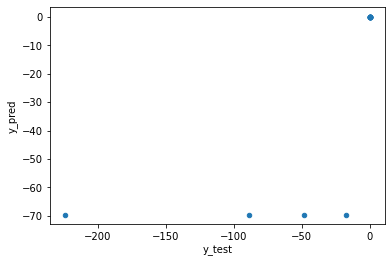

In [68]:
final.plot.scatter('y_test', 'y_pred')

*Random Forest*

In [69]:
best_forest = RandomForestRegressor(max_depth=20,
                                    max_features='log2',
                                    n_estimators=200,
                                    random_state=21).fit(X_train, y_train)

In [70]:
final = pd.DataFrame({'y_test': y_test, 'y_pred': best_forest.predict(X_test)})
final

,y_test,y_pred
3,0.0,0.000000
19,-17.5,-50.311917
14,-48.5,-76.082833
45,-223.6,-67.670833
10,0.0,0.000000
54,0.0,0.000000
23,0.0,-0.196667
29,0.0,-1.607500
24,0.0,-0.196667
13,-89.0,-74.741083


<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

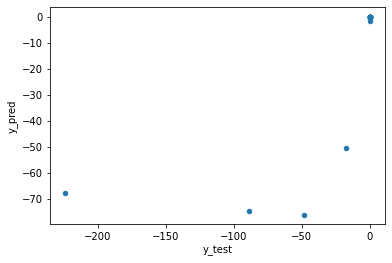

In [71]:
final.plot.scatter('y_test', 'y_pred')

3. Как выглядел бы график для идеального случая? Запишите ответ в markdown-ячейку в конце этой секции.

Прямая диагональная линия - график функции y = x(т.у. y_pred = y_test)